# **YOUTUBE EDA**

### Setup and Load Data

In [185]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

# Nice plot theme
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10,6)
from matplotlib.colors import LinearSegmentedColormap

In [272]:
#Load CSV
df = pd.read_csv("youtube_data.csv")

#Quick look
df.head()

,video_id,title,description,tags,Date,view_count,like_count,comment_count,duration_iso,scrape_date,search_query,duration_seconds,engagement_rate,age_days,video_type,title_length,Trend_ID
0,Ou2yy8WJZYM,"Viral Tomato & Feta Pasta, My way! 💁‍♀️ #Dinne...",This is my second most viral video with over 2...,NaN,2025-01-29,22128183,1273406,16747,PT2M44S,2025-10-17 19:03:19.957044+00:00,feta pasta,164.0,0.058304,261.255590,Longer_Video,80,feta-pasta
1,vm7FE008wXE,this is the best pasta ever 😩,NaN,NaN,2022-02-26,9935831,647616,7017,PT1M,2025-10-17 19:03:19.957077+00:00,feta pasta,60.0,0.065886,1329.028182,Longer_Video,29,feta-pasta
2,OhElQbL28dM,My family hates my feta pasta recipe | MyHealt...,NaN,NaN,2022-05-20,8664046,350579,2056,PT35S,2025-10-17 19:03:19.957084+00:00,feta pasta,35.0,0.040701,1246.697546,Short,52,feta-pasta
3,LVoix3f10bg,Viral Baked Feta Pasta 2 Years Later | FeelGoo...,NaN,NaN,2023-01-04,7670460,357192,1485,PT24S,2025-10-17 19:03:19.957088+00:00,feta pasta,24.0,0.046761,1017.683402,Short,53,feta-pasta
4,wp75SQqB-NU,Vegan Feta Cheese Pasta 🧀 🍅🍝😋 #shorts #Feta #p...,NaN,NaN,2022-12-24,6296526,0,514,PT44S,2025-10-17 19:03:19.957091+00:00,feta pasta,44.0,0.000082,1028.599791,Short,96,feta-pasta


In [274]:
# Basic info and nulls
df.info()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_id          2000 non-null   object 
 1   title             2000 non-null   object 
 2   description       1074 non-null   object 
 3   tags              599 non-null    object 
 4   Date              2000 non-null   object 
 5   view_count        2000 non-null   int64  
 6   like_count        2000 non-null   int64  
 7   comment_count     2000 non-null   int64  
 8   duration_iso      2000 non-null   object 
 9   scrape_date       2000 non-null   object 
 10  search_query      2000 non-null   object 
 11  duration_seconds  2000 non-null   float64
 12  engagement_rate   2000 non-null   float64
 13  age_days          2000 non-null   float64
 14  video_type        2000 non-null   object 
 15  title_length      2000 non-null   int64  
 16  Trend_ID          2000 non-null   object 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
video_id,2000,1955,_yEQCyKmLzQ,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,2000,1935,Baked Feta Pasta,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,1074,1043,#shorts,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tags,599,579,bosh|bosh vegan|bosh tv|bosh veggie|bosh veget...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,2000,853,2025-10-12,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view_count,2000.0,NaN,NaN,NaN,4171706.6425,15066741.968292,192.0,92022.75,562810.5,2631061.75,333128812.0
like_count,2000.0,NaN,NaN,NaN,93568.7825,284248.081184,0.0,1012.25,7811.5,58449.5,4745463.0
comment_count,2000.0,NaN,NaN,NaN,604.7485,1823.88323,0.0,17.0,87.0,393.25,32977.0
duration_iso,2000,199,PT1M,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scrape_date,2000,2000,2025-10-17 19:03:19.957044+00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Basic Data Cleaning Checks

In [276]:
# Missing values summary
df.isna().sum()

# Check duplicates
df.duplicated(subset='video_id').sum()

# Convert date column to datetime (in case saved as string)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

### Overview Statistics

In [278]:
print("Total videos:", len(df))
print("Trends captured:", df['Trend_ID'].unique())

df.groupby('Trend_ID')[['view_count','like_count','comment_count']].describe()

Total videos: 2000
Trends captured: ['feta-pasta' 'matcha' 'dubai-chocolate' 'airfryer']


view_count                                                                                    like_count                                                                         comment_count                                                            
                     count         mean           std      min        25%        50%         75%          max      count        mean            std  min      25%      50%        75%        max         count      mean          std  min    25%    50%      75%      max
Trend_ID                                                                                                                                                                                                                                                                  
airfryer             500.0  3227501.334  8.632831e+06  91983.0  322504.50   792969.5  2463466.25  124665055.0      500.0   56749.078  173478.155409  0.0  2955.00   9538.0   36299.25  2770326.0         500.0   302.874   746.687862  0.0  34.00   87.0   242.50   7954.0
dubai-chocolate      500.0  9314064.378  2.668579e+07  33430.0  494893.75  2329190.0  8557027.25  333128812.0      500.0  195910.444  441157.289264  0.0  4862.50  41654.0  200637.00  4745463.0         500.0  1389.498  2966.624549  0.0  85.75  367.0  1415.75  32977.0
feta-pasta           500.0   255943.516  1.351907e+06    192.0    1870.75     6817.0    35524.00   22128183.0      500.0   12375.080   75782.327027  0.0    35.75    146.0     912.50  1273406.0         500.0   108.762   842.095595  0.0   1.00    5.0    22.00  16747.0
matcha               500.0  3889317.342  8.835888e+06  32284.0  235238.75  1117295.0  2698497.50   96177760.0      500.0  109240.528  272967.612500  0.0  5299.25  23855.0   86564.75  2882140.0         500.0   617.860  1517.770033  0.0  54.00  162.0   527.00  17960.0

### Patterns - Trend Lifecycle

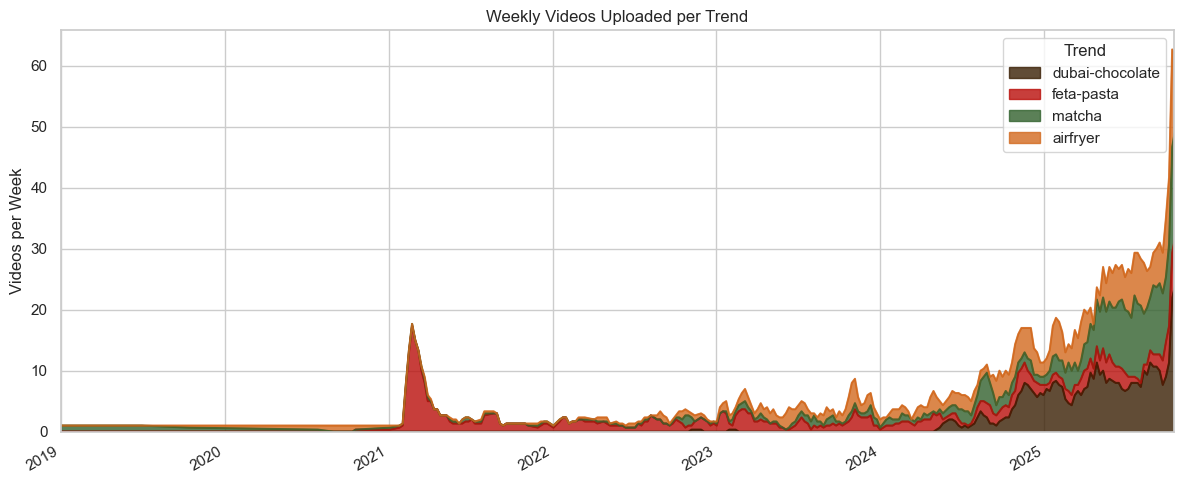

In [286]:
#Upload Frequency: Number of Videos Posted per Day

colors = {'dubai-chocolate':'#3A1F04','feta-pasta':'#B90E0A','matcha':'#32612D', 'airfryer': '#D2691E'}

# weekly aggregation
weekly = (df.groupby(['Trend_ID', pd.Grouper(key='Date', freq='W-MON')])['video_id']
            .count()
            .reset_index(name='weekly_videos'))

# pivot to wide format and smooth with rolling mean
pivot = weekly.pivot(index='Date', columns='Trend_ID', values='weekly_videos').fillna(0)
pivot = pivot.rolling(window=3, min_periods=1).mean()  # 3-week smoothing

# plot stacked area (order columns explicitly)
cols = ['dubai-chocolate','feta-pasta','matcha', 'airfryer']
pivot[cols].plot.area(figsize=(12,5), color=[colors[c] for c in cols], alpha=0.8)
plt.xlim(pd.Timestamp('2019-01-01'), df['Date'].max())
plt.title('Weekly Videos Uploaded per Trend')
plt.ylabel('Videos per Week')
plt.xlabel('')
plt.legend(title='Trend')
plt.tight_layout()
plt.show()

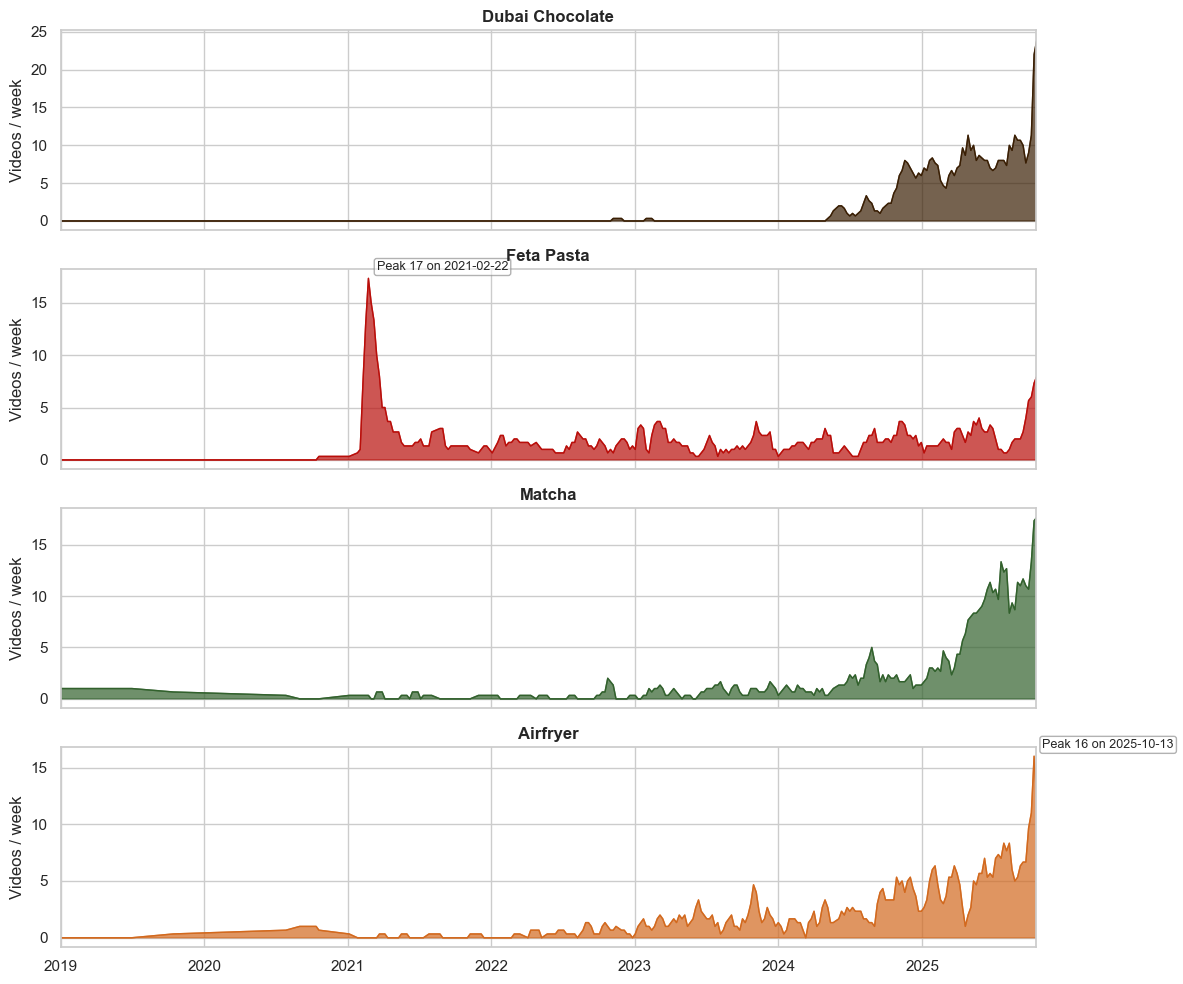

In [296]:
colors = {
    'dubai-chocolate':'#3A1F04',
    'feta-pasta':'#B90E0A',
    'matcha':'#32612D',
    'airfryer':'#D2691E'   
}

# include airfryer in the trend order
cols = ['dubai-chocolate','feta-pasta','matcha','airfryer']

# ensure pivot has all columns (create zero-series if missing)
for c in cols:
    if c not in pivot.columns:
        pivot[c] = 0

# optional: keep columns in the specified order
pivot = pivot[cols]

# create one subplot per trend (nrows set dynamically)
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(12, 2.5*len(cols)), sharex=True)

for ax, trend in zip(axes, cols):
    series = pivot[trend]
    ax.fill_between(series.index, series.values, color=colors[trend], alpha=0.7)
    ax.plot(series.index, series.values, color=colors[trend], linewidth=1)
    ax.set_title(trend.replace('-', ' ').title(), fontsize=12, weight='bold')
    ax.set_ylabel('Videos / week')
    # annotate max
    mx = series.max()
    if mx > 0:
        mx_date = series.idxmax().strftime('%Y-%m-%d')
        ax.annotate(f'Peak {int(mx):,} on {mx_date}',
                    xy=(series.idxmax(), mx),
                    xytext=(6, 6),
                    textcoords='offset points',
                    fontsize=9,
                    bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='gray', alpha=0.6))

# focus x-range on active years
plt.xlim(pd.Timestamp('2019-01-01'), df['Date'].max())

plt.tight_layout()
plt.show()

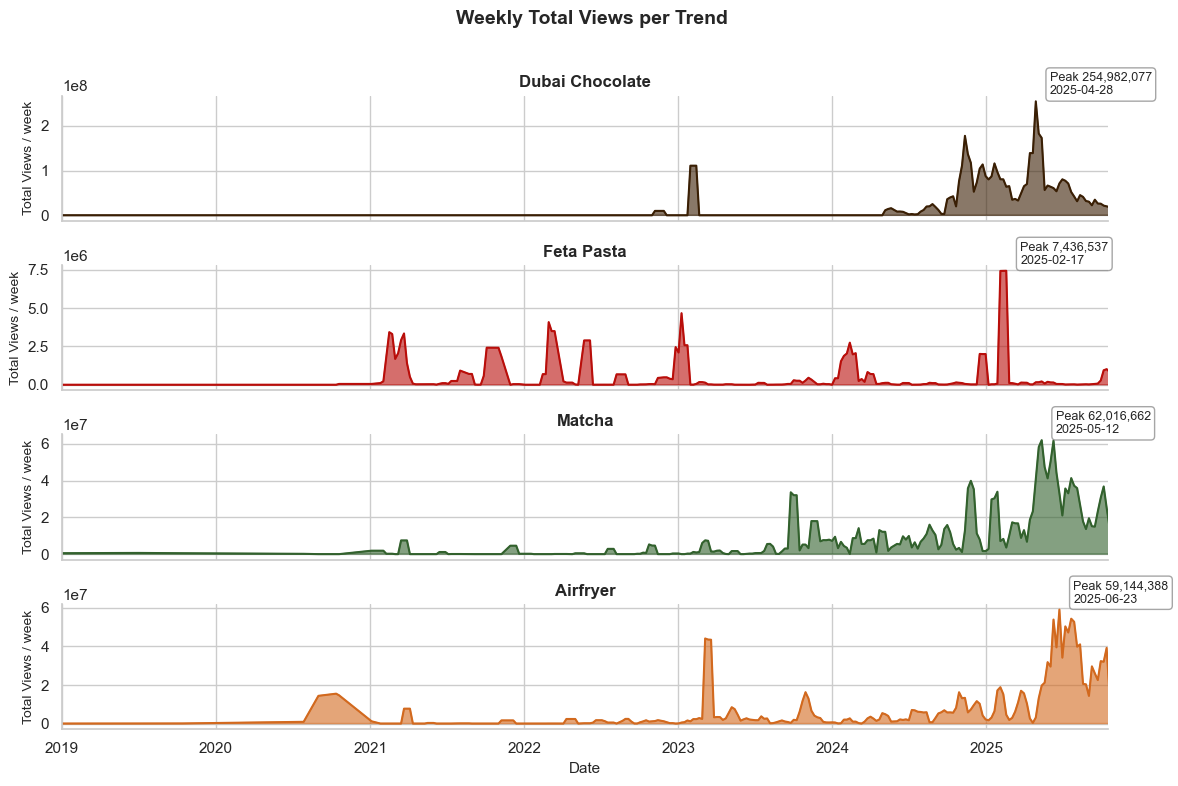

In [312]:
#Trend Lifecycle Over Time (Popularity Curve)

# Total views per trend
# --- Weekly aggregation of total views ---
weekly_views = (
    df.groupby(['Trend_ID', pd.Grouper(key='Date', freq='W-MON')])['view_count']
      .sum()
      .reset_index(name='weekly_views')
)

# --- Pivot to wide format and smooth with rolling average ---
pivot_views = weekly_views.pivot(index='Date', columns='Trend_ID', values='weekly_views').fillna(0)
pivot_views = pivot_views.rolling(window=3, min_periods=1).mean()  # 3-week smoothing

colors = {
    'dubai-chocolate':'#3A1F04',
    'feta-pasta':'#B90E0A',
    'matcha':'#32612D',
    'airfryer':'#D2691E'   
}

cols = ['dubai-chocolate','feta-pasta','matcha','airfryer']

# --- Create separate subplots for clarity ---
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12,8), sharex=True)

for ax, trend in zip(axes, cols):
    series = pivot_views[trend]
    ax.fill_between(series.index, series.values, color=colors[trend], alpha=0.6)
    ax.plot(series.index, series.values, color=colors[trend], linewidth=1.5)
    
    # Titles & labels
    ax.set_title(trend.replace('-', ' ').title(), fontsize=12, weight='bold')
    ax.set_ylabel('Total Views / week', fontsize=10)
    
    # Annotate peak value
    mx = series.max()
    if mx > 0:
        mx_date = series.idxmax().strftime('%Y-%m-%d')
        ax.annotate(f'Peak {int(mx):,}\n{mx_date}', xy=(series.idxmax(), mx),
                    xytext=(10, 5), textcoords='offset points', fontsize=9,
                    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', alpha=0.7))
        
sns.despine()
axes[-1].set_xlabel('Date', fontsize=11)
fig.suptitle('Weekly Total Views per Trend', fontsize=14, weight='bold')
             
# focus x-range on active years
plt.xlim(pd.Timestamp('2019-01-01'), df['Date'].max())
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

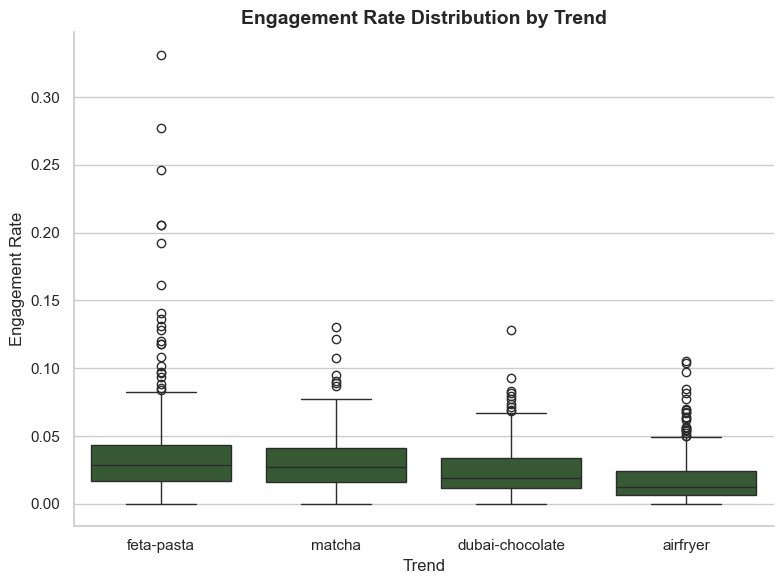

In [314]:
#Engagement Patterns Across Trends

plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x='Trend_ID',
    y='engagement_rate',
    color='#32612D'  
)
plt.title('Engagement Rate Distribution by Trend', fontsize=14, weight='bold')
plt.xlabel('Trend')
plt.ylabel('Engagement Rate')
sns.despine()
plt.tight_layout()
plt.show()

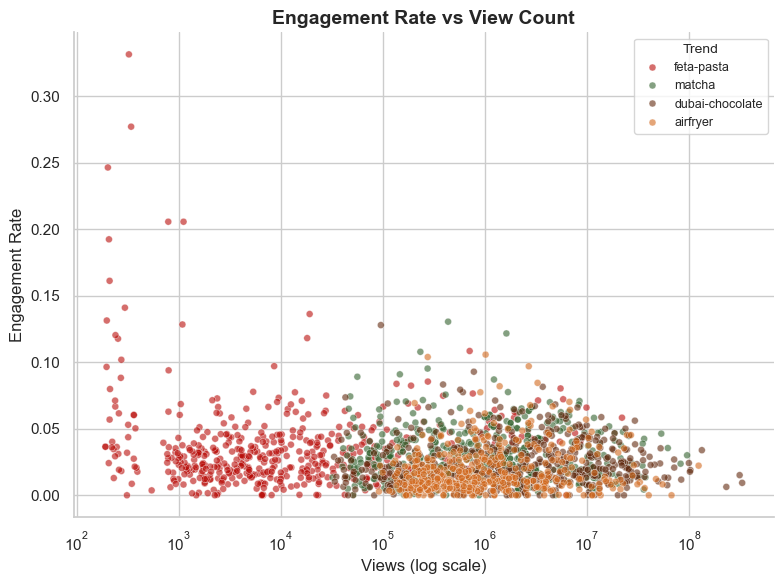

In [320]:
# Relationship Between Views and Engagement

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='view_count',
    y='engagement_rate',
    hue='Trend_ID',
    palette={
        'dubai-chocolate':'#622A0F', 
        'feta-pasta':'#B90E0A',       
        'matcha':'#32612D',
        'airfryer':'#D2691E'
    },
    alpha=0.6,
    s = 25
)
plt.xscale('log')  # log scale because views span several magnitudes
plt.title('Engagement Rate vs View Count', fontsize=14, weight='bold')
plt.xlabel('Views (log scale)', fontsize=12)
plt.ylabel('Engagement Rate', fontsize=12)
plt.legend(title='Trend', fontsize=9, title_fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

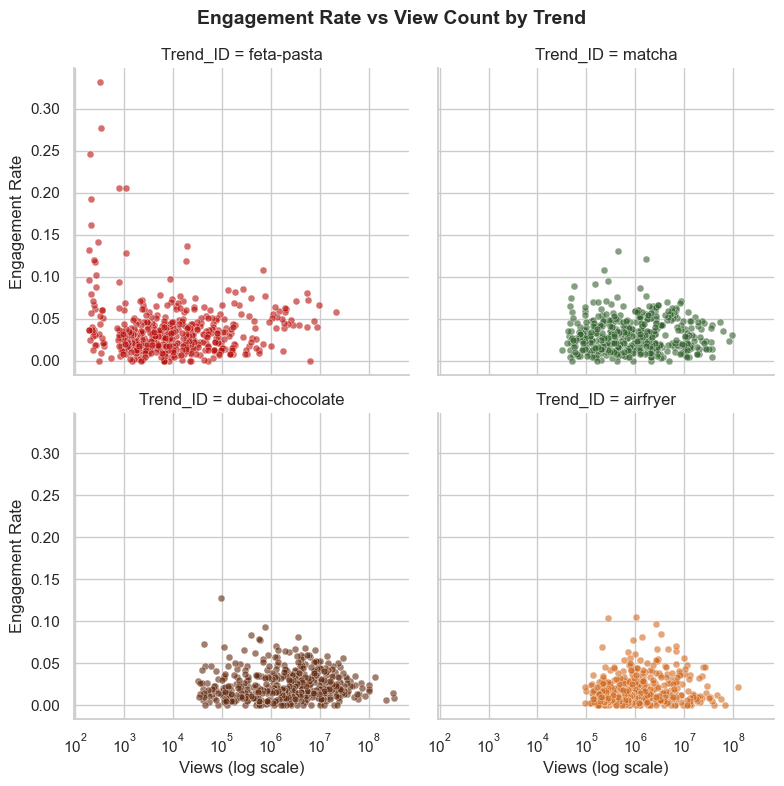

In [322]:
g = sns.FacetGrid(df, col='Trend_ID', hue='Trend_ID',
                  col_wrap=2, height=4, sharey=True, sharex=True,
                  palette={
                      'dubai-chocolate':'#622A0F',
                      'feta-pasta':'#B90E0A',
                      'matcha':'#32612D',
                      'airfryer':'#D2691E'
                  })
g.map_dataframe(sns.scatterplot, x='view_count', y='engagement_rate', alpha=0.6, s=25)
g.set(xscale='log')
g.set_axis_labels('Views (log scale)', 'Engagement Rate')
g.fig.suptitle('Engagement Rate vs View Count by Trend', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

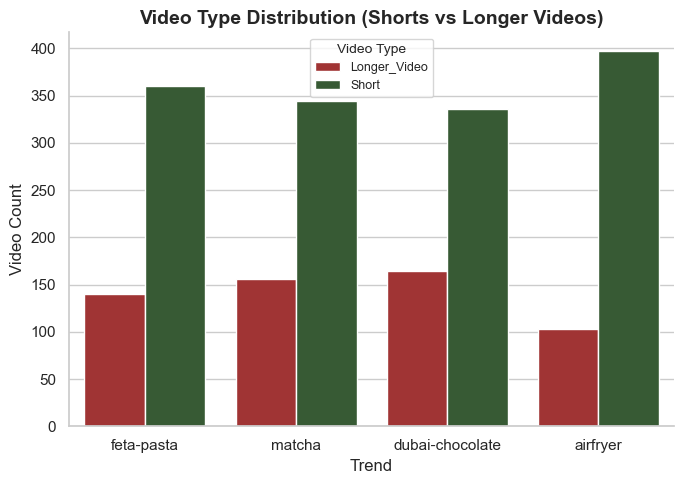

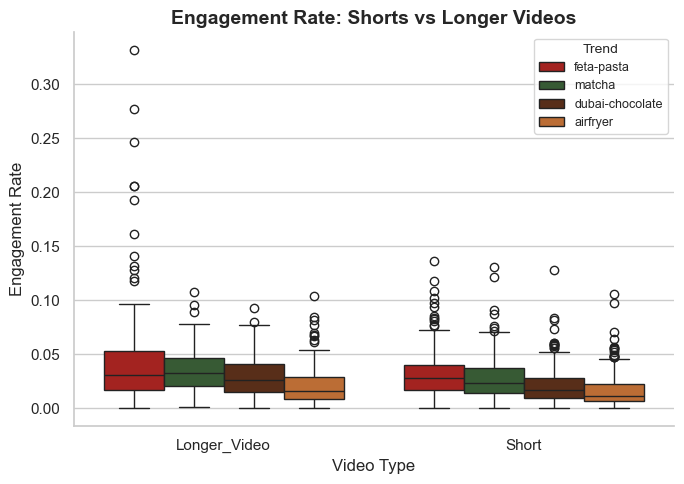

In [330]:
video_palette = ['#B22222', '#32612D']  # red for Shorts, green for Longer Videos

# --- Count Comparison ---
plt.figure(figsize=(7,5))
sns.countplot(
    data=df,
    x='Trend_ID',
    hue='video_type',
    palette=video_palette
)
plt.title('Video Type Distribution (Shorts vs Longer Videos)', fontsize=14, weight='bold')
plt.xlabel('Trend', fontsize=12)
plt.ylabel('Video Count', fontsize=12)
plt.legend(title='Video Type', fontsize=9, title_fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

# --- Engagement Comparison ---
plt.figure(figsize=(7,5))
sns.boxplot(
    data=df,
    x='video_type',
    y='engagement_rate',
    hue='Trend_ID',
    palette={
        'feta-pasta': '#B90E0A',
        'matcha': '#32612D',
        'dubai-chocolate': '#622A0F',
        'airfryer':'#D2691E'
    }
)
plt.title('Engagement Rate: Shorts vs Longer Videos', fontsize=14, weight='bold')
plt.xlabel('Video Type', fontsize=12)
plt.ylabel('Engagement Rate', fontsize=12)
plt.legend(title='Trend', fontsize=9, title_fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

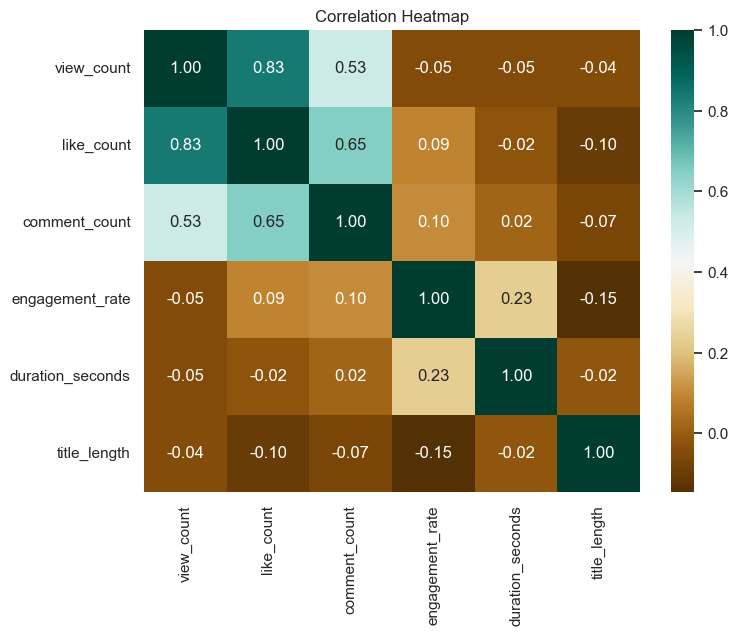

In [332]:
# Correlation Between Quantitative Metrics
numeric_cols = ['view_count', 'like_count', 'comment_count',
                'engagement_rate', 'duration_seconds', 'title_length']

corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='BrBG', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

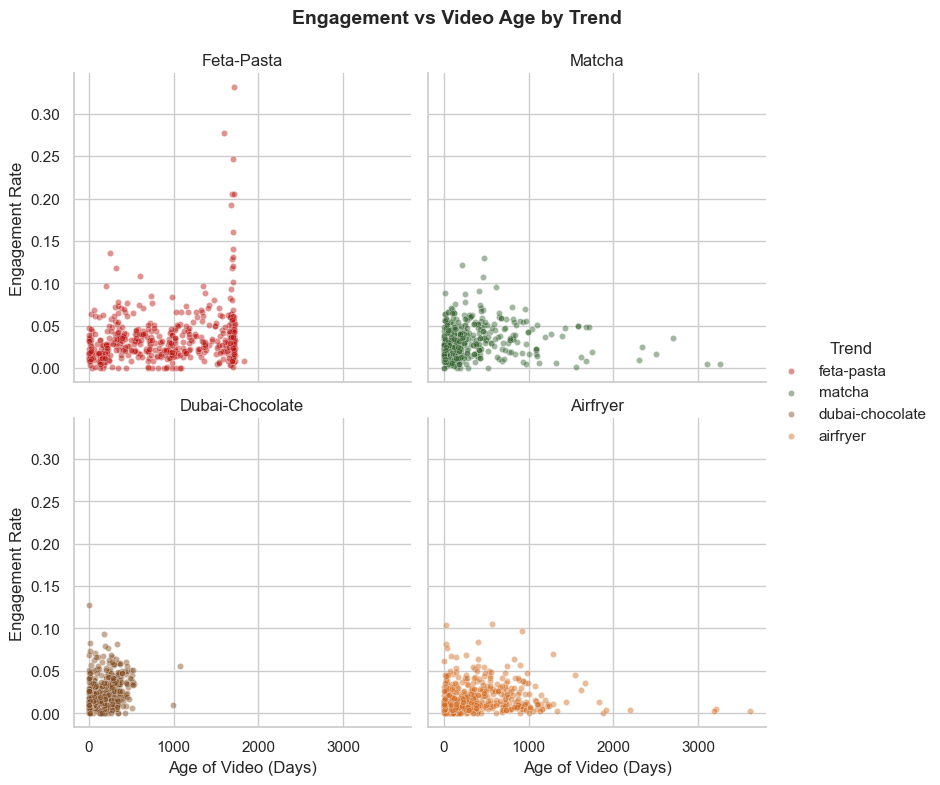

In [362]:
#Trend Longevity (Video Age vs Engagement)

palette = {
    'matcha': '#32612D',
    'dubai-chocolate': '#7E481C',
    'feta-pasta': '#B90E0A',
    'airfryer': '#D2691E'
}

# Create FacetGrid: 2x2 layout, shared x/y axes
g = sns.FacetGrid(
    df,
    col='Trend_ID',
    hue='Trend_ID',
    palette=palette,
    col_wrap=2,
    height=4,
    sharex=True,
    sharey=True
)

g.map_dataframe(
    sns.scatterplot,
    x='age_days',
    y='engagement_rate',
    alpha=0.45,
    s=20
)

# Use the correct placeholder and then title-case each subplot title
g.set_titles(col_template='{col_name}')        # correct placeholder
g.set_axis_labels('Age of Video (Days)', 'Engagement Rate')

# title-case the printed titles (replace underscores with spaces)
for ax in g.axes.flat:
    ax.set_title(ax.get_title().replace('_', ' ').title())

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Engagement vs Video Age by Trend', fontsize=14, weight='bold')
g.add_legend(title='Trend')
sns.despine()
plt.show()

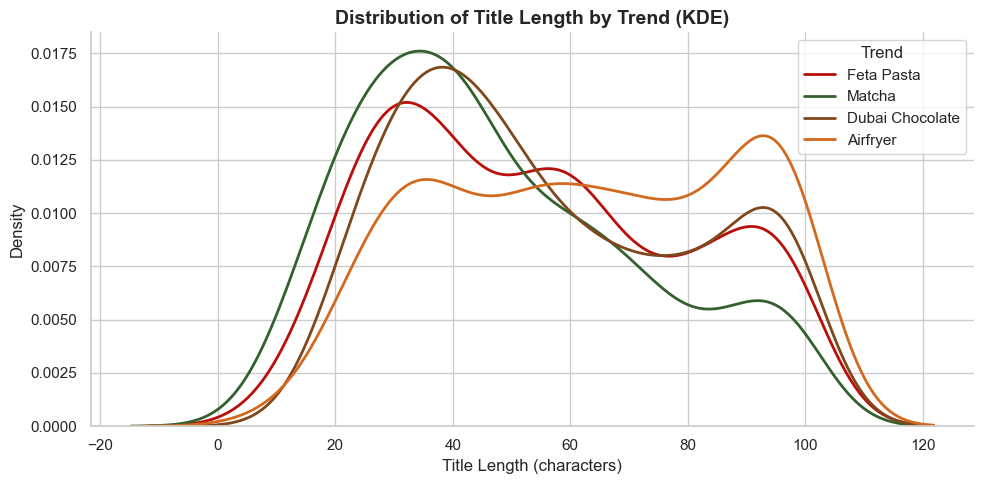

In [372]:
#Distribution of Title Length by Trend 

plt.figure(figsize=(10,5))
for trend, color in {
    'feta-pasta':'#B90E0A',
    'matcha':'#32612D',
    'dubai-chocolate':'#7E481C',
    'airfryer':'#D2691E'
}.items():
    sns.kdeplot(
        df.loc[df['Trend_ID']==trend, 'title_length'],
        fill=False,
        lw=2,
        label=trend.replace('-', ' ').title(),
        color=color,
        bw_adjust=1.0
    )

plt.title('Distribution of Title Length by Trend (KDE)', fontsize=14, weight='bold')
plt.xlabel('Title Length (characters)')
plt.ylabel('Density')
plt.legend(title='Trend')
sns.despine()
plt.tight_layout()
plt.show()

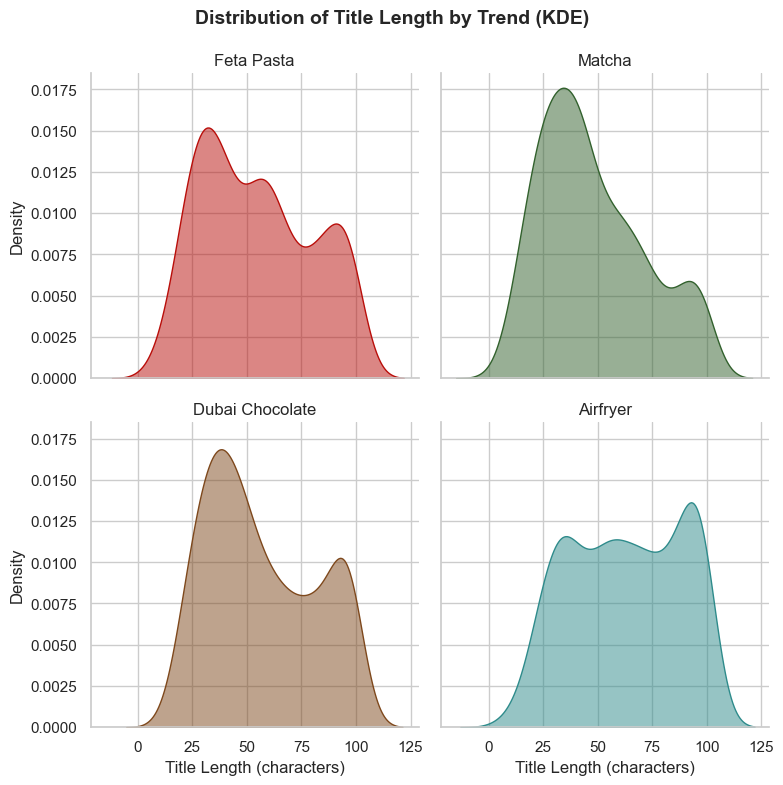

In [398]:
g = sns.FacetGrid(
    df,
    col='Trend_ID',
    hue='Trend_ID',
    col_wrap=2,
    height=4,
    sharex=True,
    sharey=True,
    palette={
        'feta-pasta':'#B90E0A',
        'matcha':'#32612D',
        'dubai-chocolate':'#7E481C',
        'airfryer':'#2E8B8B'
    }
)

g.map_dataframe(sns.kdeplot, x='title_length', fill=True, alpha=0.5, bw_adjust=1.0)
g.set_titles(col_template='{col_name}')          # <- keep the template as-is
g.set_axis_labels('Title Length (characters)', 'Density')

# Post-process titles: replace hyphens and title-case
for ax in g.axes.flat:
    ax.set_title(ax.get_title().replace('-', ' ').title())

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Title Length by Trend (KDE)', fontsize=14, weight='bold')
sns.despine()
plt.show()

In [97]:
#Top Performing Videos

top_videos = (
    df.sort_values(by='view_count', ascending=False)
      .groupby('Trend_ID')
      .head(5)
      .reset_index(drop=True)
)
top_videos[['Trend_ID','title','view_count','like_count','engagement_rate']].style.format({
    'view_count':'{:,}',
    'like_count':'{:,}',
    'engagement_rate':'{:.2%}'
})

,Trend_ID,title,view_count,like_count,engagement_rate
0,dubai-chocolate,Dip ice-cream in Dubai at Mall of the Emirates…. Magnum ice-cream,"387,041,778","8,529,828",2.21%
1,dubai-chocolate,130gr Dubai chocolate 🍫 x 100 smiles 🙏🏻,"314,478,900","4,743,789",1.51%
2,dubai-chocolate,FUFUSQUISHY ASMR🍫🍫Dubai Chocolate,"233,052,631","1,460,318",0.63%
3,dubai-chocolate,Dubai chocolate 🤎 #asmr #asmrsounds,"134,118,592","4,523,120",3.39%
4,dubai-chocolate,Have you tried Dubai chocolate? 🍫😍,"103,445,194","1,953,147",1.89%
5,matcha,Japanese Mochi,"95,868,781","2,879,371",3.01%
6,matcha,Matcha ASMR - Whisk and Sifter gifted from Tezumi Tea,"82,903,029","1,965,973",2.37%
7,matcha,My matcha whisk is moldy!,"62,254,892","2,205,036",3.55%
8,matcha,How to use a new matcha whisk,"53,716,773","2,486,112",4.63%
9,matcha,"THE ANGELO MATCHA drops June 1! First 50 in line get it FREE! 7473 Melrose Ave, LA. See you there ❤️","37,564,722","502,222",1.35%


In [99]:
#Combined Metric: Trend Strength Index

trend_strength = (
    df.groupby('Trend_ID')[['view_count','engagement_rate']]
    .mean()
    .assign(strength_index=lambda x: (x['view_count']/x['view_count'].max() + x['engagement_rate']/x['engagement_rate'].max())/2)
    .sort_values('strength_index', ascending=False)
)
trend_strength


,view_count,engagement_rate,strength_index
Trend_ID,,,
dubai-chocolate,9827240.516,0.024482,0.873688
matcha,4090370.192,0.028553,0.643942
feta-pasta,253893.612,0.032757,0.512918


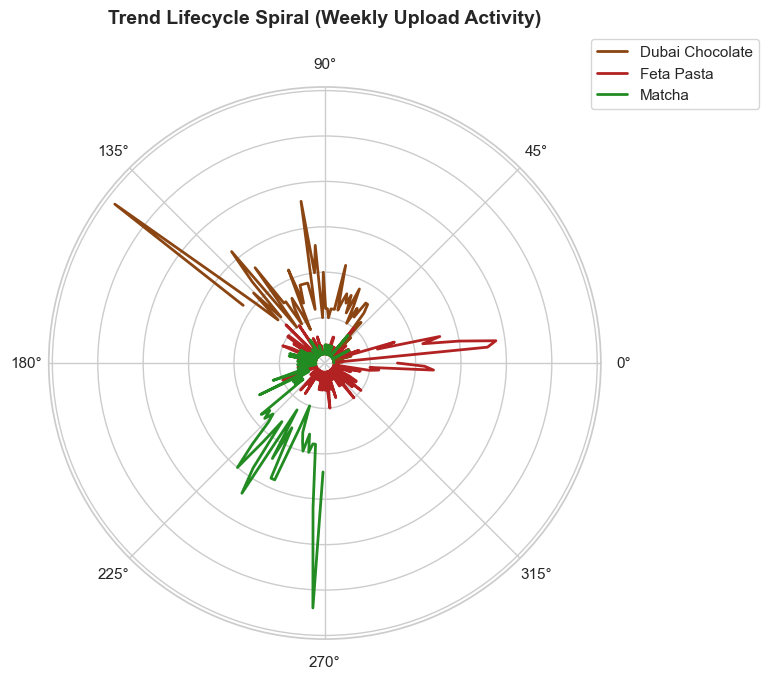

In [268]:
#Trend Lifecycle Spiral

# Weekly total video counts
weekly_counts = (
    df.groupby(['Trend_ID', pd.Grouper(key='Date', freq='W-MON')])['video_id']
      .count()
      .reset_index(name='weekly_videos')
)

# Normalize weeks within each trend
weekly_counts['week_num'] = weekly_counts.groupby('Trend_ID').cumcount()
weekly_counts['angle'] = weekly_counts['week_num'] * (2 * np.pi / weekly_counts['week_num'].max())

colors = {
    'dubai-chocolate': '#8B4513',  # brown
    'feta-pasta': '#B22222',       # firebrick
    'matcha': '#228B22'            # forest green
}

fig = plt.figure(figsize=(8,8), facecolor='white')
ax = plt.subplot(111, polar=True)

for trend, color in colors.items():
    subset = weekly_counts[weekly_counts['Trend_ID'] == trend]
    ax.plot(subset['angle'], subset['weekly_videos'], color=color, linewidth=2, label=trend.replace('-', ' ').title())

ax.set_title('Trend Lifecycle Spiral (Weekly Upload Activity)', fontsize=14, weight='bold', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.set_yticklabels([])
plt.tight_layout()
plt.show()

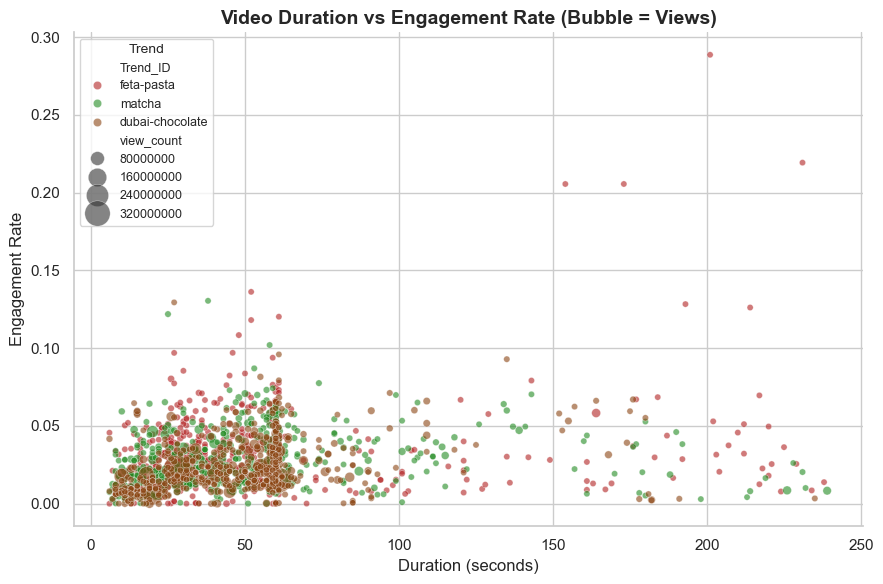

In [270]:
#Engagement vs Duration by Trend

plt.figure(figsize=(9,6))
sns.scatterplot(
    data=df,
    x='duration_seconds',
    y='engagement_rate',
    hue='Trend_ID',
    size='view_count',
    sizes=(20, 400),
    alpha=0.6,
    palette={
        'dubai-chocolate':'#8B4513',
        'feta-pasta':'#B22222',
        'matcha':'#228B22'
    }
)

plt.title('Video Duration vs Engagement Rate (Bubble = Views)', fontsize=14, weight='bold')
plt.xlabel('Duration (seconds)')
plt.ylabel('Engagement Rate')
plt.legend(title='Trend', fontsize=9, title_fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()